<a href="https://colab.research.google.com/github/Mr-Hexi/ML-Course/blob/main/end_to_end_dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data 

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them). 


In [2]:
# Unzip the uploaded data into the G-Drive

#!unzip "drive/MyDrive/Dog Vision/dog-breed-identification (1).zip" -d "drive/My Drive/Dog Vision/"

### Get Our Workspace Ready


* Import TensorFlow 2.x ✅
* Import TensorFlow Hub✅
* Make sure we're using a GPU✅

In [3]:
# # Import TensorFlow into Colab
# import tensorflow as tf
# print("TF version:", tf.__version__)

In [4]:
# Import Necessary Tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version", hub.__version__)

# Check for GPU avalaibility
print("GPU", "available(YESSSS!!!!)" if tf.config.list_physical_devices("GPU") else "not Available :(  ")

TF version: 2.7.0
TF Hub version 0.12.0
GPU available(YESSSS!!!!)


## Getting our Data Ready (turning into Tensors)

With all ML models, our data has to be in numerical format. So that's what we'll be doing first. Turnning our images into TensorFlow (numerical Representation)

Let's start by accessing our data and checking out the labels.

In [5]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


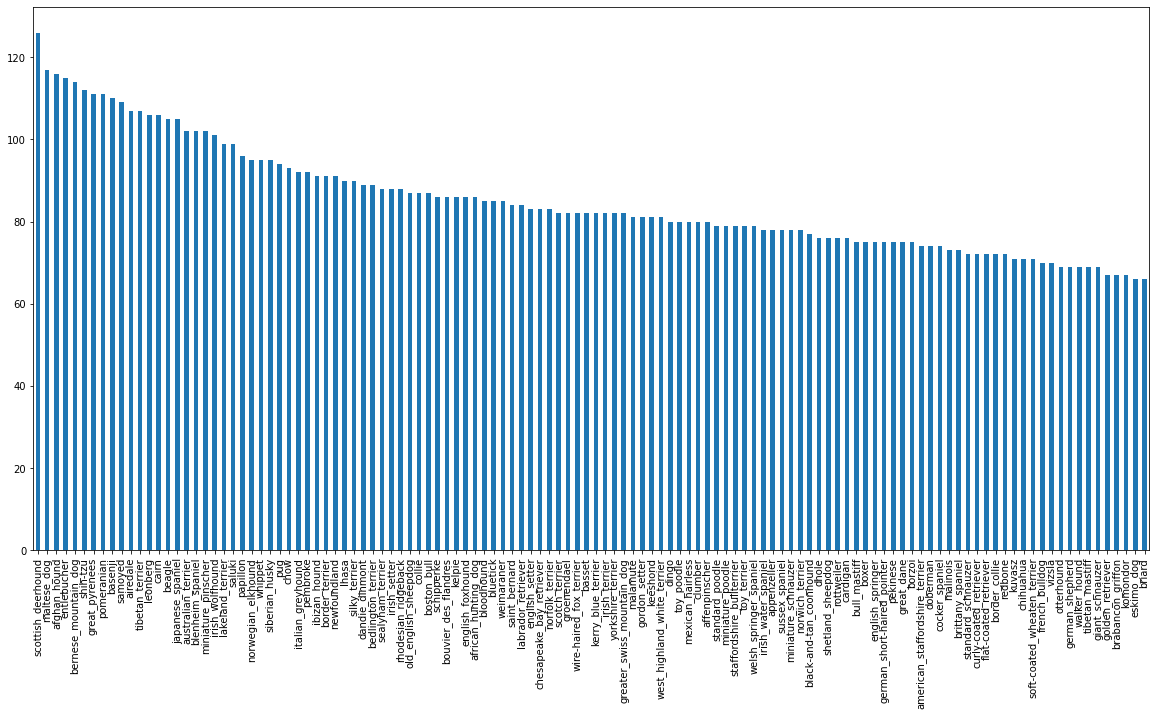

In [7]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [8]:
labels_csv["breed"].value_counts().median()

82.0

In [9]:
from IPython.display import Image

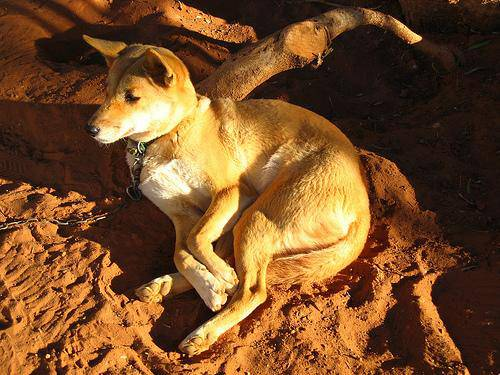

In [10]:
Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and thier labels

Let's get a list of all of our image file path name

In [11]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [12]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/Dog Vision/train/"+fname+".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [13]:
import os
os.listdir("drive/My Drive/Dog Vision/train/")[:10]

['e6a62f69da66da8492120ac8107f68c1.jpg',
 'dbde111456535431c6caedfa5b8c8dea.jpg',
 'e3728ac64318af2803ea1774459b2df0.jpg',
 'e6a382c2cca7aa606dda1d5f7109cddc.jpg',
 'e146cabda18bbb2cb402dece1a7dd4ef.jpg',
 'e25fb7b550a55bfb47e3805fc00292bb.jpg',
 'dbd006d2d983a1b52238dc293d5139c0.jpg',
 'ddde5939ee7175be941a1ae0b8fb404f.jpg',
 'e89f2129dc5830c7ba5114c7c79ee459.jpg',
 'e438c6b845a8498620dc14f2f25bf603.jpg']

In [14]:
# Check whether number of filenames matched number of actual image files
# (len(labels_csv["id"]) == len(filenames))
import os
if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory")

Filenames match actual amount of files!!! Proceed.


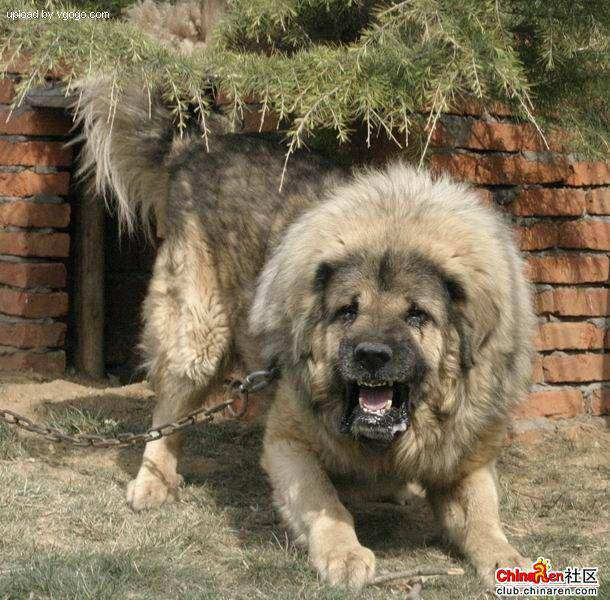

In [15]:
# One more check
Image(filenames[9000])

In [16]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [17]:
import numpy as np
labels = labels_csv["breed"].to_numpy()  
# labels = np.array(labels) does samething as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
len(labels)

10222

In [19]:
# See if numbers of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Numbers of labels matches number of filnames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Numbers of labels matches number of filnames!


In [20]:
# Find the unique label values
unique_breeds = np.unique(labels)

len(unique_breeds) 

120

In [21]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [22]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] ==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [23]:
# Turn every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
len(labels)

10222

In [25]:
len(boolean_labels)

10222

In [26]:
# Example: Turning boolean array into integers
print(labels[0]) # original label 
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where labels occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label is occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [27]:
print(labels[2])
print(np.where(unique_breeds== labels[2]))
print(boolean_labels[2].argmax())
print(boolean_labels[2].astype(int))

pekinese
(array([85]),)
85
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [28]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [29]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own Validation set

Since the dataset from kaggle doesn't come with a validation set, we're going to create our own.

In [30]:
# setup X & y  variables
X = filenames
y = boolean_labels

In [31]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images and increase as needed

In [32]:
# Set numbers of images to use fore experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [33]:
# Let's split our data into train and validation
from sklearn.model_selection import train_test_split

# Split data into training and validation of total size NUM_IMAGES
X_train,X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES]
                                                 ,y[:NUM_IMAGES]
                                                 ,test_size=0.2,
                                                 random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [34]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing Images(turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable, `image`
3. Turn our `image` into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1).
5. Resize the `image` to be a shape of(224,224)
6. Return the Modified image

Before we do, let's see what importing an image looks like.

In [35]:
# Convert an image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [36]:
image.max(), image.min()

(255, 0)

In [37]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [38]:
# Turn image into Tensor
tf.constant(image) [:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like a Tensor, let's make a function to preprocess them.

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable, `image`
3. Turn our `image` into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1).
5. Resize the `image` to be a shape of(224,224)
6. Return the Modified image

In [39]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path , img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """

  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the image into numerical Tensor with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from (0-255) to (0-1) values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired values (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

  return image


In [40]:
tensor = tf.io.read_file(filenames[26])
# tensor

In [41]:
tensor = tf.image.decode_jpeg(tensor, channels=3)[:2]

In [42]:
tensor = tf.image.convert_image_dtype(tensor, tf.float32)

In [43]:
resize_tensor = tf.image.resize(tensor,size=[IMG_SIZE,IMG_SIZE])
resize_tensor.shape

TensorShape([224, 224, 3])

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit  into memory.

So that's whu we do about 32 (this is batch size) images at a time (you can manually adjust batchsize if needed).

In order to use Tensorflow effectively,  we need  our data in the form of Tensor tuples  whcih looks like this:
`(image,label)`.

In [44]:
# Create a simple Function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image path name and the associated label,
  processes the image and returns a tuple of (images,label).
  """
  image = process_image(image_path)
  return image, label


In [45]:
# Demo of the above
(process_image(X[42], tf.constant(y[42])))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117757],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

Now we've got a way to turn our data into Tensors in the form: `(image,label)`, let's make a function to turn all of our data (`X`&`y`) into batches!

In [46]:
# Define the Batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to our data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False, test_data=False):
  """
  Create batches of data out of image (X) and labels (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if its Validation data.
  Also accepts test data as input (no labels)
  """
  # If the data is test dataset, we probably don't have labels.
  if test_data:
    print("Creating test data batches....")
     # Turns All X & y into Tensor Dataset
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    # Turns into batch of batchsize of 32
    data_batch = data.map(process_image).batch(batch_size=BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating Validation data batches...")
    # Turns All X & y into Tensor Dataset
    data =tf.data.Dataset.from_tensor_slices((tf.constant(X), # Filepaths
                                              tf.constant(y))) # labels
    # Turns into batch of batchsize of 32
    data_batch = data.map(get_image_label).batch(batch_size=BATCH_SIZE)
    return data_batch
  else:
    print("Creating training Data batches....")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                                tf.constant(y))) # filepaths
    # Shuffle pathnames and labels before mapping image preocessor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create (image,label) tuples (this aslo turns the image path to preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(batch_size=BATCH_SIZE)

  return data_batch    
    

In [47]:
# Create training and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val, valid_data=True)

Creating training Data batches....
Creating Validation data batches...


In [48]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them!

In [49]:
import matplotlib.pyplot as plt

# Create a Function for viewing images in a data batch

def show_25_images(images, labels):
  """
  Displays a plot of 25 images and thier labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5,5,i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")


In [50]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [51]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [52]:
# Takes the data unbatches using as_numpy_iterator() 
# train_images, train_labels = next(train_data.as_numpy_iterator())
# train_images, train_labels

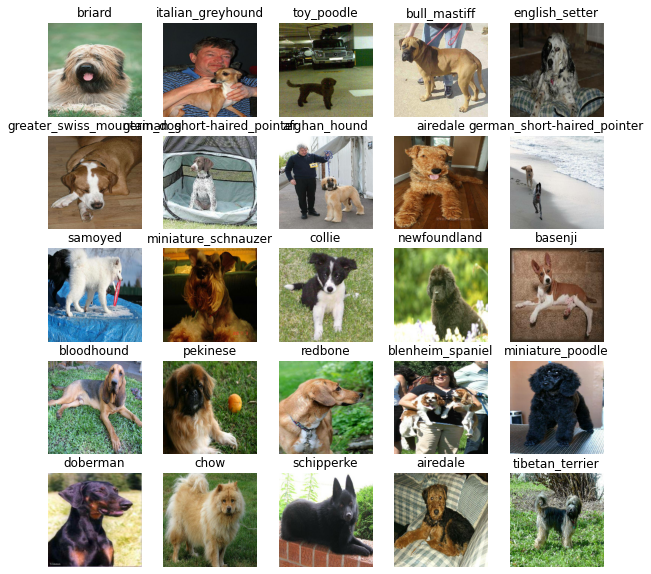

In [53]:
# Now let's visualize the data in a training Batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

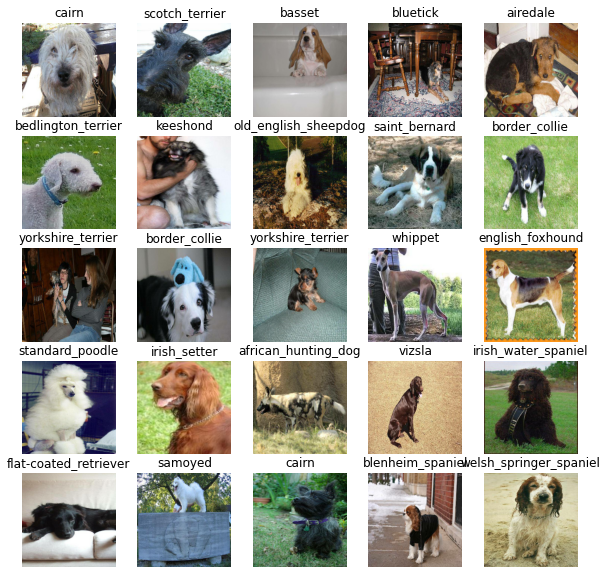

In [54]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a Model

Before we buid a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image label, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub- https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [55]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds)

# Setup modle URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got our inputs, outputs and model ready to go.
Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape, and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this,then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be  getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/sequential_model

In [56]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url= MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
       hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
       tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                             activation="softmax") # Layer 2 (output layer)
  ])
  
  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [57]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [58]:
outputs = np.ones(shape=(1,1,1289))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

## Creating callbacks

Callbacks are helper function a model can use during training to do such things as save its progress, checks its progress or stop training early if the model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callbacks

To setup a TensorBoard callback, we need to do three things:
1. Load the TensorBoard notebook extension. ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.✅
3. Visualize our model's training logs with `%tensorboard` magic function (we'll do this after model training).

In [59]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [60]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a Log directory for storing Tensorboard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get track whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)
  

### Early stopping Callback
Early Stopping helps stop our model from overfitting by stopping training if a certain evaluation metrics stop improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [61]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                   patience=3)

## Training a model (on a subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [62]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, steps:10}

In [63]:
# Check to make we're still running on a GPU
print("GPU","available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not Available ):")

GPU available (YESSSS!!!!!)
